In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
import math


# Question #2
Write a Python code to implement forward and backward steps on a neural
network.
    • The code should support only fully connected layers

    • The code should support sigmoid and RelU as non-linearities

    • There is no need to get a textual definition of the layers

    • You may assume the input given is correct

    • You may assume all weights are initialized as a part of the input

    • Bonus: support also batch normalization layers
    
Check your answer to question number 1 using your code.


In [127]:
X_vector = np.array([1, 2, -1]).reshape(3, 1)
y_real = np.array([0])
layers = [3, 2, 2, 1]
params_w = {}
activation=['relu', 'relu', 'linear']
l=len(layers)
for layer in range(0,l-1):
    in_layer_size = layers[layer]
    out_layer_size = layers[layer + 1]
    params_w['Weight- Layer #:' + str(layer + 1)] = np.ones((out_layer_size, in_layer_size))

In [129]:
# -----------------------------------------------------ACTIVATION FUNCTIONS----------------------------------------------------
#Sigmoid
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def sigmoid_deriviate(deriviate_init,sigmoid_on_x):
    return deriviate_init *sigmoid_on_x*(1 - sigmoid_on_x)

#relu activation
def relu(x):
    return np.maximum(x, 0)

def relu_deriviate(deriviate_init,x):
    d = np.array(deriviate_init, copy = True)
    d[x < 0] = 0.
    return d

#Linear activation
def linear(x):
    return x
def linear_deriviate(deriviate_init,x):
    return 1*deriviate_init

# -----------------------------------------------------FEED FORWARD----------------------------------------------------

def one_layer_feed_forward(input_activations, weights, activation='relu'):
    output = np.dot(weights, input_activations)
    if activation == 'relu':
        act_out = relu(output)
    elif activation == 'linear':
        act_out = linear(output)
    else:
        act_out = sigmoid(output)
    
    return act_out, output

def feed_forward(X, params_w, layers, activate):
    acivated_output_dict = {}
    output_dict = {}
    act_out = X
    l=len(layers)
    for layer in range(0,l-1):
        layer_index = layer + 1
        prev_act = act_out
        curr_weight = params_w['Weight- Layer #:' + str(layer_index)]
        act_out, curr_out = one_layer_feed_forward(prev_act, curr_weight, activate[layer])
        acivated_output_dict['Inputs- Layer #:' + str(layer)] = prev_act
        output_dict['Outputs- Layer #:' + str(layer_index)] = curr_out

    return y_predict, acivated_output_dict, output_dict


# -----------------------------------------------------BACKPROPAGATION----------------------------------------------------
def one_layer_back_propagation(gradient, curr_weight, curr_out, prev_act, activation='relu'):
    if activation == 'relu':
        deriviate = relu_deriviate
    elif activation == 'linear':
        deriviate = linear_deriviate
    else:
        deriviate = sigmoid_deriviate

    activation_deriviate = deriviate(gradient,curr_out)
    weight_deriviate = np.dot(activation_deriviate, prev_act.T) / prev_act.shape[1] #devide it by num of sample in previou output
    prev_layer_deriviate = np.dot(curr_weight.T, activation_deriviate) #deriviate from prev. layer
    return prev_layer_deriviate, weight_deriviate

def back_propagation(y_pred, y_real, acivated_output_dict, output_dict, params_w, layers, activate):
    delta = {}
    n = y_real.shape[0]
    y_real = y_real.reshape(y_pred.shape)
    prev_layer_deriviate = (-2*np.subtract(y_real, y_pred)).reshape(1, n) # derivative of loss function (RSS)

    # num_layers = len(layers) - 1
    layer = [x + 1 for x in range(0,len(layers) - 1)]
    layer.reverse()

    for index, layer in enumerate(layer):
        activation = activate[layer - 1]
        deriviate_y_predict = prev_layer_deriviate
        prev_act = acivated_output_dict['Inputs- Layer #:' + str(layer - 1)]  # activations are one index behind
        curr_out = output_dict['Outputs- Layer #:' + str(layer)]
        curr_weight = params_w['Weight- Layer #:' + str(layer)]
        prev_layer_deriviate, weight_deriviate = one_layer_back_propagation(deriviate_y_predict, curr_weight, curr_out,
                                                                         prev_act, activation)
        delta['Gradient in weights- Layer #:' + str(layer)] = weight_deriviate

    return delta


In [130]:
y_predict, acivated_output_dict, output_dict = feed_forward(X, params_w, layers, activate=activation)
weight_gradient = back_propagation(y_predict[0], y_real, acivated_output_dict, output_dict, params_w, layers, activate=activation)
print(weight_gradient)

{'Gradient in weights- Layer #:3': array([[64., 64.]]), 'Gradient in weights- Layer #:2': array([[32., 32.],
       [32., 32.]]), 'Gradient in weights- Layer #:1': array([[ 32.,  64., -32.],
       [ 32.,  64., -32.]])}


# Question #4

## a) 
Prepare the data to check the solution.

• X is a set of 10000 points in R4. The points are drawn uniformly in [0, 1]4.

• The noise ϵ is i.i.d. and distributed normally with σ2 = 1

• Y = X1 − 2X2 + 3X3 − 4X4 + ϵ

In [140]:
datapoints = np.random.uniform(0, 1, [10000,4])
#The noise ϵ is i.i.d. and distributed normally with σ2 = 1
noise = np.random.normal(loc=0.0, scale=1.0, size=[10000])
# Y = X1 − 2X2 + 3X3 − 4X4 + ϵ
y=datapoints[:,0]-2*datapoints[:,1]+3*datapoints[:,2]-4*datapoints[:,3]+noise 

full_data = np.column_stack((datapoints, noise,y))
full_df=pd.DataFrame(full_data)
full_df

,0,1,2,3,4,5
0,0.370028,0.366189,0.679630,0.977529,0.144455,-2.089122
1,0.572543,0.236666,0.454282,0.370391,-0.326395,-0.345902
2,0.942748,0.744354,0.732867,0.543704,-0.001074,-0.523250
3,0.773825,0.402981,0.989639,0.788293,0.661702,0.445310
4,0.346142,0.635322,0.697407,0.447632,-1.712445,-2.335254
...,...,...,...,...,...,...
9995,0.762940,0.140126,0.693435,0.990157,-0.557294,-1.954926
9996,0.988881,0.938126,0.328672,0.646548,-0.445043,-2.932590
9997,0.138154,0.146569,0.695032,0.877752,-0.119225,-1.700121
9998,0.435529,0.173439,0.491458,0.443693,0.035656,-0.176092


In [141]:
data=full_df.loc[:,0:3]
target=full_df.loc[:,5]
data.shape

(10000, 4)

## b) 
Implement the Gradient Descent (GD) algorithm. The algorithm gets:

(i) a step size (learning rate),

(ii) an initial solution and

(iii) a function that returns the gradient of the RSS in a given point. The GD algorithm starts from an initial guess, and change it iteratively by moving in the opposite direction of the gradient. The algorithm runs a fixed number of iterations or until convergence.

The iteration can be written as follows:

Wi+1 = Wi − α∇W Loss

Where α is the learning rate.


In [142]:
# General Parameters
lr =0.2
n_iter = 5000
treshold=0.0001

In [143]:
# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)
y_train = pd.DataFrame(y_train)
y_test  = pd.DataFrame(y_test)


In [144]:
def  cal_cost(w,X,y):
    m = len(y)
    predictions = X.dot(w)
    # cost = (1/2*m) * np.sum(np.square(predictions-y))
    cost = np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,w,learning_rate,iterations, treshold):

    m = len(y)
    cost_history = np.zeros(iterations)
    w_history = np.ones((iterations,5))
    it=0
    diff=1000
    # for it in range (iterations):
    while it < iterations and diff>=treshold:
        prediction = np.dot(X,w)
        # Compute w and devide the gradient by number of samples (to get the Avg. gradient)
        w = w -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        w_history[it,:] =w.T
        diff=abs(w_history[it,:]-w_history[it-1,:]).mean()
        cost_history[it]  = cal_cost(w,X,y)
        it=it+1
        
    return diff,it,w, cost_history, w_history

In [145]:
w = np.random.randn(5,1)

X_b = np.c_[np.ones((len(x_train),1)),x_train]
update_diff, actual_iterations,w,cost_history,w_history = gradient_descent(X_b,y_train,w,lr,n_iter,treshold)

# Change the size of the cost and thetha history to fit the number of actual iterations (else- it will fill all other cels in zeros which is not true)
cost_history = cost_history[0:actual_iterations]
w_history = w_history[0:actual_iterations]

print('w0: {:0.3f},\nw1: {:0.3f}\nw2: {:0.3f}\nw3: {:0.3f}\nw4: {:0.3f}'.format(w[0][0],w[1][0],w[2][0],w[3][0],w[4][0]))
print('Final cost/RSS:  {:0.3f}'.format(cost_history[-1]))
print('iterations:{:0.3f}'.format(actual_iterations))
print('actual_trashold:  {:0.3f}'.format(update_diff))



w0: -0.013,
w1: 1.077
w2: -2.027
w3: 3.016
w4: -4.043
Final cost/RSS:  7847.790
iterations:396.000
actual_trashold:  0.000


Text(0.5, 1.0, 'Cost function- basic conditions\n\nIterations:396 , Cost (RSS): 7848')

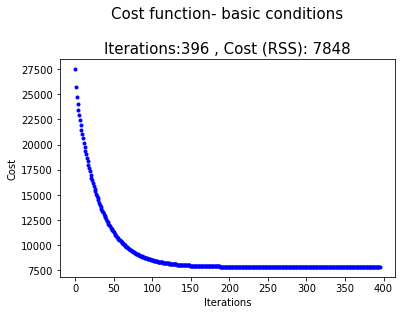

In [146]:
fig,ax = plt.subplots(figsize=(6,4))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(actual_iterations),cost_history,'b.')
plt.title('Cost function- basic conditions\n\n'+'Iterations:' +str(actual_iterations)+' , Cost (RSS): '+ str(round(cost_history[actual_iterations-1])), fontsize=15)



## C)
Check how each of the following changes affect the preformance:

• Exponential decay of the step-size

• Calculate the gradient in batches, namely, implement Stochastic Gradient Descent.

• Change the update step to include momentum, specifically use the folowing update:

vi+1 = γvi + α∇W Loss

Wi+1 = Wi − vi+1

Where γ ∈ (0, 1].

**Note:** gamma may also be changed during the algorithm, what would be the impact of increasing it?

Change #1-Exponential Decay of Step Size

In [147]:
def exp_decay(iteration, lr_history):
   initial_lrate = 0.5
   lrate = initial_lrate * math.exp(-iteration)
   lr_history[iteration] =lrate

   return lrate,lr_history

def grad_descent_with_exp_decay(X,y,w,iterations, treshold):

    m = len(y)
    cost_history1 = np.zeros(iterations)
    w_history = np.ones((iterations,5))
    lr_history = np.zeros(iterations)

    it1=0
    diff=1000
    # for it in range (iterations):
    while it1 < iterations and diff>=treshold:
        prediction = np.dot(X,w)
        # Compute w and devide the gradient by number of samples (to get the Avg. gradient)
        learning_rate,lr_history=exp_decay(it1,lr_history)
        w = w -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        w_history[it1,:] =w.T
        diff=abs(w_history[it1,:]-w_history[it1-1,:]).mean()
        cost_history1[it1]  = cal_cost(w,X,y)
        it1=it1+1

        
    return diff,it1,w, cost_history1, w_history,lr_history

In [148]:
w = np.random.randn(5,1)

X_b = np.c_[np.ones((len(x_train),1)),x_train]
update_diff, actual_iterations1,w,cost_history1,w_history,lr_history = grad_descent_with_exp_decay(X_b,y_train,w,n_iter,treshold)

# Change the size of the cost and thetha history to fit the number of actual iterations (else- it will fill all other cels in zeros which is not true)
cost_history1 = cost_history1[0:actual_iterations1]
w_history = w_history[0:actual_iterations1]
lr_history=lr_history[0:actual_iterations1]

print('w0: {:0.3f},\nw1: {:0.3f}\nw2: {:0.3f}\nw3: {:0.3f}\nw4: {:0.3f}'.format(w[0][0],w[1][0],w[2][0],w[3][0],w[4][0]))
print('Final cost/RSS:  {:0.3f}'.format(cost_history1[-1]))
print('iterations:{:0.3f}'.format(actual_iterations1))
print('actual_trashold:  {:0.3f}'.format(update_diff))

w0: -0.087,
w1: 0.579
w2: -0.827
w3: -1.000
w4: -0.591
Final cost/RSS:  27541.668
iterations:8.000
actual_trashold:  0.000


Text(0.5, 1.0, 'Iterations:8 , Learning Rate0.0004559409827772581')

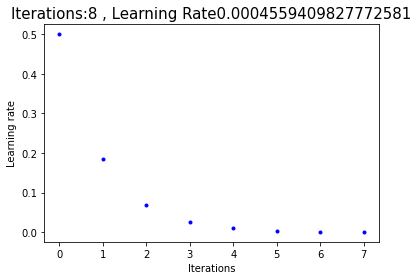

In [149]:
fig,ax = plt.subplots(figsize=(6,4))
ax.set_ylabel('Learning rate')
ax.set_xlabel('Iterations')
ax.plot(range(actual_iterations1),lr_history,'b.')
plt.title('Iterations:' +str(actual_iterations1)+' , Learning Rate'+ str(lr_history[actual_iterations1-1]), fontsize=15)



Text(0.5, 1.0, 'Cost function- with Exp Decay learning rate\n\nIterations:8 , Cost (RSS): 27542')

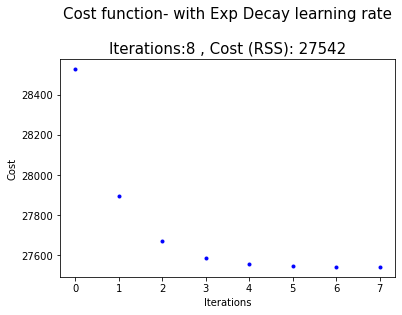

In [150]:
fig,ax = plt.subplots(figsize=(6,4))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(actual_iterations1),cost_history1,'b.')
plt.title('Cost function- with Exp Decay learning rate\n\n'+'Iterations:' +str(actual_iterations1)+' , Cost (RSS): '+ str(round(cost_history1[actual_iterations1-1])), fontsize=15)



Change #2- Stochastic Gradient Decent

In [151]:
def minibatch_gradient_descent(X,y,w,learning_rate,iterations,batch_size,treshold):
    m = len(y)
    cost_history2 = np.zeros(iterations)
    w_history = np.ones((iterations,5))
    it2=0
    diff=1000
    append = np.append(X, y, axis=1)
    no_of_batches=m//batch_size

    # Need to shuffle the samples before we will devide them to mini batches
    np.random.shuffle(append)
    X=append[:,0:5]
    y=append[:,5:6]
    
    while it2 < iterations and diff>=treshold:
        cost =0.0
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            prediction = np.dot(X_i,w)
            w = w -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(w,X_i,y_i)
        w_history[it2,:] =w.T
        diff=abs(w_history[it2,:]-w_history[it2-1,:]).mean()
        cost_history2[it2]  = cost       
        it2=it2+1
        
    return diff,it2,w, cost_history2, w_history

        


In [152]:
w = np.random.randn(5,1)
batch_size=1000
X_b = np.c_[np.ones((len(x_train),1)),x_train]

update_diff, actual_iterations2,w,cost_history2,w_history = minibatch_gradient_descent(X_b,y_train,w,lr,n_iter,batch_size,treshold)


# Change the size of the cost and thetha history to fit the number of actual iterations (else- it will fill all other cels in zeros which is not true)
cost_history2 = cost_history2[0:actual_iterations2]
w_history = w_history[0:actual_iterations2]

print('w0: {:0.3f},\nw1: {:0.3f}\nw2: {:0.3f}\nw3: {:0.3f}\nw4: {:0.3f}'.format(w[0][0],w[1][0],w[2][0],w[3][0],w[4][0]))
print('Final cost/RSS:  {:0.3f}'.format(cost_history2[-1]))
print('iterations:{:0.3f}'.format(actual_iterations2))
print('actual_trashold:  {:0.3f}'.format(update_diff))

w0: -0.016,
w1: 1.077
w2: -2.028
w3: 3.021
w4: -4.042
Final cost/RSS:  7847.477
iterations:451.000
actual_trashold:  0.000


Text(0.5, 1.0, 'Cost function- Stochastic Gradiend Decent\n\nIterations:451 , Cost (RSS): 7847')

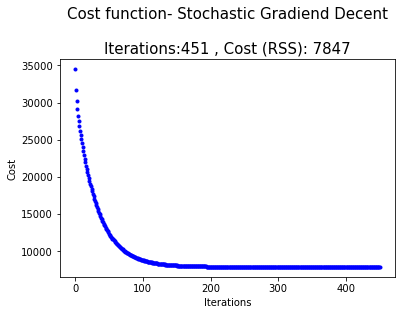

In [153]:
fig,ax = plt.subplots(figsize=(6,4))
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(actual_iterations2),cost_history2,'b.')
plt.title('Cost function- Stochastic Gradiend Decent\n\n'+'Iterations:' +str(actual_iterations2)+' , Cost (RSS): '+ str(round(cost_history2[actual_iterations2-1])), fontsize=15)



Change #3- update step will includ Momentum

In [154]:
def grad_descent_with_momentum(X,y,w,learning_rate,iterations, treshold, gamma):
    m = len(y)
    cost_history3 = np.zeros(iterations)
    w_history = np.ones((iterations,5))
    gm_history = np.zeros(iterations)
    delta_w = np.zeros(w.shape)


    it3=0
    diff=1000
    # for it in range (iterations):
    while it3 < iterations and diff>=treshold:
        prediction = np.dot(X,w)
        momentum=gamma*delta_w
        # Compute w and devide the gradient by number of samples (to get the Avg. gradient)
        # gamma,gm_history=gamma_change(iterations,it1,gm_history)
        delta_w = (1/m)*learning_rate*( X.T.dot((prediction - y))) + momentum
        w = w-delta_w
        # w = w -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        w_history[it3,:] =w.T
        diff=abs(w_history[it3,:]-w_history[it3-1,:]).mean()
        cost_history3[it3]  = cal_cost(w,X,y)
        it3=it3+1

        
    return diff,it3,w, cost_history3, w_history,gamma,gm_history


w0: -0.004,
w1: 1.070
w2: -2.033
w3: 3.016
w4: -4.048
Final cost/RSS:  7847.611
iterations:202.000
actual_trashold:  0.000


Text(0.5, 1.0, 'Cost function- learning Rate with momentum (gamma=0.5)\n\nIterations:202 , Cost (RSS): 7848')

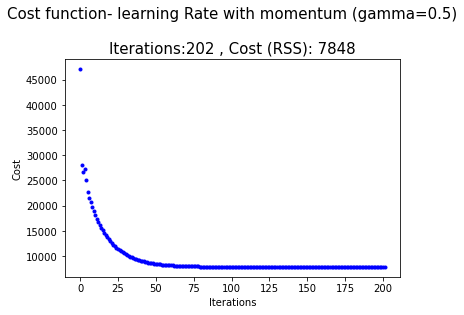

In [163]:
# Gamma = 0.5
w = np.random.randn(5,1)
gamma=0.5

X_b = np.c_[np.ones((len(x_train),1)),x_train]
update_diff, actual_iterations3,w,cost_history3,w_history,gamma,gm_history = grad_descent_with_momentum(X_b,y_train,w,lr,n_iter,treshold, gamma)

# Change the size of the cost and thetha history to fit the number of actual iterations (else- it will fill all other cels in zeros which is not true)
cost_history3 = cost_history3[0:actual_iterations3]
w_history = w_history[0:actual_iterations3]
gm_history=gm_history[0:actual_iterations1]

print('w0: {:0.3f},\nw1: {:0.3f}\nw2: {:0.3f}\nw3: {:0.3f}\nw4: {:0.3f}'.format(w[0][0],w[1][0],w[2][0],w[3][0],w[4][0]))
print('Final cost/RSS:  {:0.3f}'.format(cost_history3[-1]))
print('iterations:{:0.3f}'.format(actual_iterations3))
print('actual_trashold:  {:0.3f}'.format(update_diff))

fig,ax = plt.subplots(figsize=(6,4))
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(actual_iterations3),cost_history3,'b.')
plt.title('Cost function- learning Rate with momentum (gamma=0.5)\n\n'+'Iterations:' +str(actual_iterations3)+' , Cost (RSS): '+ str(round(cost_history3[actual_iterations3-1])), fontsize=15)

w0: -0.001,
w1: 1.071
w2: -2.036
w3: 3.016
w4: -4.052
Final cost/RSS:  7847.568
iterations:166.000
actual_trashold:  0.000


Text(0.5, 1.0, 'Cost function- learning Rate with momentum (gamma=0.7)\n\nIterations:166 , Cost (RSS): 7848')

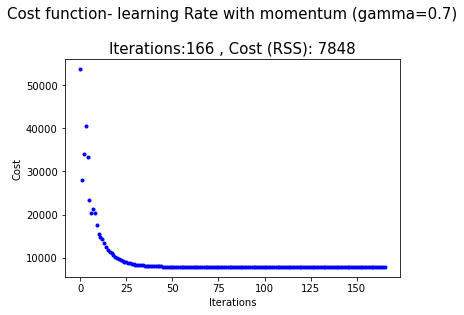

In [164]:
# Gamma = 0.7
w = np.random.randn(5,1)
gamma=0.7

X_b = np.c_[np.ones((len(x_train),1)),x_train]
update_diff, actual_iterations3,w,cost_history3,w_history,gamma,gm_history = grad_descent_with_momentum(X_b,y_train,w,lr,n_iter,treshold, gamma)

# Change the size of the cost and thetha history to fit the number of actual iterations (else- it will fill all other cels in zeros which is not true)
cost_history3 = cost_history3[0:actual_iterations3]
w_history = w_history[0:actual_iterations3]
gm_history=gm_history[0:actual_iterations1]

print('w0: {:0.3f},\nw1: {:0.3f}\nw2: {:0.3f}\nw3: {:0.3f}\nw4: {:0.3f}'.format(w[0][0],w[1][0],w[2][0],w[3][0],w[4][0]))
print('Final cost/RSS:  {:0.3f}'.format(cost_history3[-1]))
print('iterations:{:0.3f}'.format(actual_iterations3))
print('actual_trashold:  {:0.3f}'.format(update_diff))

fig,ax = plt.subplots(figsize=(6,4))
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(actual_iterations3),cost_history3,'b.')
plt.title('Cost function- learning Rate with momentum (gamma=0.7)\n\n'+'Iterations:' +str(actual_iterations3)+' , Cost (RSS): '+ str(round(cost_history3[actual_iterations3-1])), fontsize=15)



w0: 0.006,
w1: 1.070
w2: -2.041
w3: 3.016
w4: -4.058
Final cost/RSS:  7847.575
iterations:132.000
actual_trashold:  0.000


Text(0.5, 1.0, 'Cost function- learning Rate with momentum (gamma=0.9)\n\nIterations:132 , Cost (RSS): 7848')

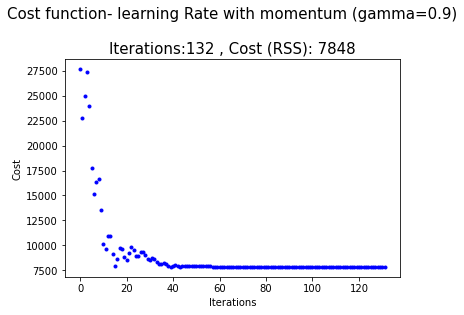

In [165]:
# Gamma = 0.9
w = np.random.randn(5,1)
gamma=0.9

X_b = np.c_[np.ones((len(x_train),1)),x_train]
update_diff, actual_iterations3,w,cost_history3,w_history,gamma,gm_history = grad_descent_with_momentum(X_b,y_train,w,lr,n_iter,treshold, gamma)

# Change the size of the cost and thetha history to fit the number of actual iterations (else- it will fill all other cels in zeros which is not true)
cost_history3 = cost_history3[0:actual_iterations3]
w_history = w_history[0:actual_iterations3]
gm_history=gm_history[0:actual_iterations1]

print('w0: {:0.3f},\nw1: {:0.3f}\nw2: {:0.3f}\nw3: {:0.3f}\nw4: {:0.3f}'.format(w[0][0],w[1][0],w[2][0],w[3][0],w[4][0]))
print('Final cost/RSS:  {:0.3f}'.format(cost_history3[-1]))
print('iterations:{:0.3f}'.format(actual_iterations3))
print('actual_trashold:  {:0.3f}'.format(update_diff))

fig,ax = plt.subplots(figsize=(6,4))
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
ax.plot(range(actual_iterations3),cost_history3,'b.')
plt.title('Cost function- learning Rate with momentum (gamma=0.9)\n\n'+'Iterations:' +str(actual_iterations3)+' , Cost (RSS): '+ str(round(cost_history3[actual_iterations3-1])), fontsize=15)



In [162]:
print('Model:')

print('Final cost/RSS- GD:  {:0.3f}'.format(cost_history[-1]))
print('iterations- GD:{:0.3f}\n\n'.format(actual_iterations))

print('Final cost/RSS- GD with Exp_decay:  {:0.3f}'.format(cost_history1[-1]))
print('iterations- GD with Exp_decay\n\n:{:0.3f}'.format(actual_iterations1))

print('Final cost/RSS- SGD:  {:0.3f}'.format(cost_history2[-1]))
print('iterations- SGD:{:0.3f}\n\n'.format(actual_iterations2))

print('Final cost/RSS- GD with momentum:  {:0.3f}'.format(cost_history3[-1]))
print('iterations- GD with momentum:{:0.3f}\n\n'.format(actual_iterations3))



Model:
Final cost/RSS- GD:  7847.790
iterations- GD:396.000


Final cost/RSS- GD with Exp_decay:  27541.668
iterations- GD with Exp_decay

:8.000
Final cost/RSS- SGD:  7847.477
iterations- SGD:451.000


Final cost/RSS- GD with momentum:  7847.558
iterations- GD with momentum:151.000


